In [159]:
from maply.geometry import Polygon, Shape, MultiPolygon
from maply.plot import Map
import geopandas as gpd
import pandas as pd

In [160]:
p1 = Polygon(coords=[(5,5),(6,5),(6,8),(5,8)], data={'sp_id': 1})
p2 = Polygon(coords=[(2,6),(2,5),(6,5),(6,6)], data={'sp_id': 2})

gdf = pd.concat([p.to_gdf() for p in [p1, p2]], ignore_index=True)
gdf

,sp_id,geometry
0,1,"POLYGON ((5 5, 6 5, 6 8, 5 8, 5 5))"
1,2,"POLYGON ((2 6, 2 5, 6 5, 6 6, 2 6))"


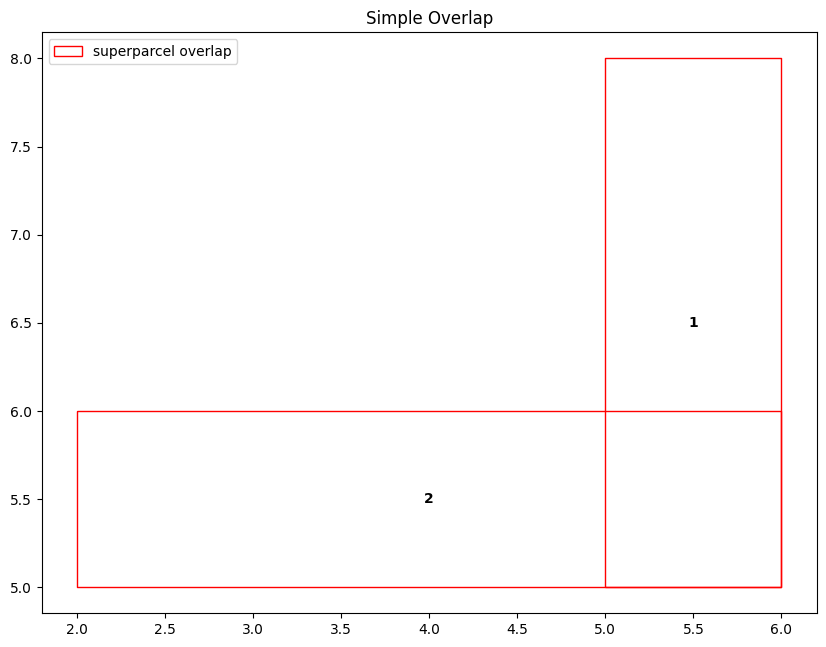

In [161]:
m = Map(title='Simple Overlap')
m.add_gdf(
    gdf, 
    layer='superparcel overlap', 
    style={'facecolor': 'none', 'edgecolor': 'red'}, 
    label='sp_id',
)
m.plot()

In [162]:

def remove_overlap(gdf):
    sindex = gdf.sindex
    result = []

    for idx, row in gdf.iterrows():
        geom = row.geometry
        possible_matches_index = list(sindex.intersection(geom.bounds)) # possible matches
        for other_idx in possible_matches_index:
            if other_idx != idx: # Avoid self-intersection
                other_geom = gdf.loc[other_idx].geometry # get the geometry of the other polygon
                if geom.intersects(other_geom):
                    geom = geom.difference(other_geom)
        if not geom.is_empty:
            new_row = row.copy()
            new_row.geometry = geom
            result.append(new_row)

    gdf_cleaned = gpd.GeoDataFrame(result, crs=gdf.crs)
    return gdf_cleaned

gdf_cleaned = remove_overlap(gdf)

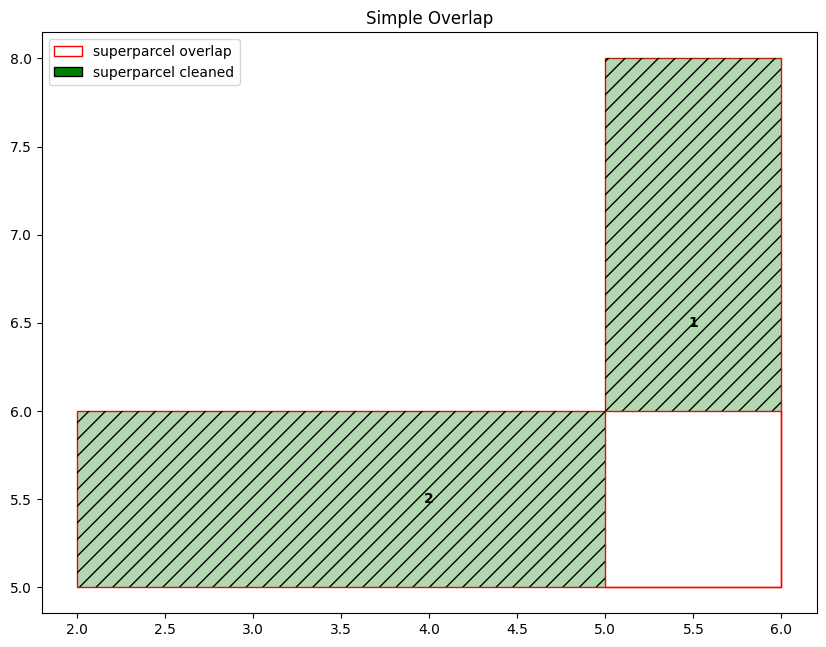

In [163]:
m.add_gdf(
    gdf_cleaned, 
    layer='superparcel cleaned', 
    style={'facecolor': 'green', 'hatch':'//', 'alpha': 0.3},)
m.plot()

In [164]:
display(gdf)
display(gdf_cleaned)

,sp_id,geometry
0,1,"POLYGON ((5 5, 6 5, 6 8, 5 8, 5 5))"
1,2,"POLYGON ((2 6, 2 5, 6 5, 6 6, 2 6))"


,sp_id,geometry
0,1,"POLYGON ((5 8, 6 8, 6 6, 5 6, 5 8))"
1,2,"POLYGON ((2 5, 2 6, 5 6, 5 5, 2 5))"


More Complex Scenario

In [165]:
p1 = Polygon(coords=[(5,5),(6,5),(6,8),(5,8)], data={'sp_id': 1})
p2 = Polygon(coords=[(7,5),(8,5),(8,8),(7,8)], data={'sp_id': 2})
p3 = Polygon(coords=[(5,7),(6,7),(6,10),(5,10)], data={'sp_id': 3})
p4 = Polygon(coords=[(7,7),(8,7),(8,10),(7,10)], data={'sp_id': 4})
p5 = Polygon(coords=[(7.5,9),(7.5,7),(10,7),(10,9)], data={'sp_id': 5})
p6 = Polygon(coords=[(9,8),(9,5),(10,5),(10,8)], data={'sp_id': 6})
p7 = Polygon(coords=[(7.5,10),(8,9.2),(10,11),(9,13)], data={'sp_id': 7})

gdf = pd.concat([p.to_gdf() for p in [p1, p2, p3, p4, p5, p6, p7]], ignore_index=True)
gdf

,sp_id,geometry
0,1,"POLYGON ((5 5, 6 5, 6 8, 5 8, 5 5))"
1,2,"POLYGON ((7 5, 8 5, 8 8, 7 8, 7 5))"
2,3,"POLYGON ((5 7, 6 7, 6 10, 5 10, 5 7))"
3,4,"POLYGON ((7 7, 8 7, 8 10, 7 10, 7 7))"
4,5,"POLYGON ((7.5 9, 7.5 7, 10 7, 10 9, 7.5 9))"
5,6,"POLYGON ((9 8, 9 5, 10 5, 10 8, 9 8))"
6,7,"POLYGON ((7.5 10, 8 9.2, 10 11, 9 13, 7.5 10))"


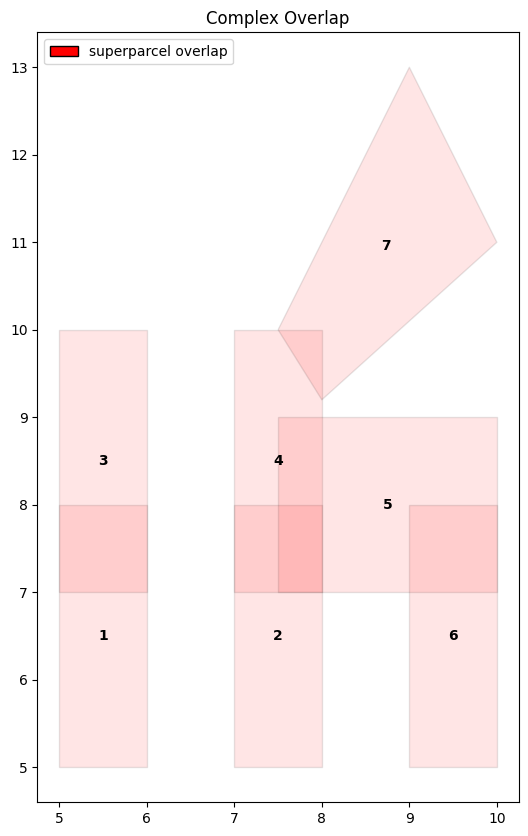

In [166]:
cm = Map(title='Complex Overlap')
cm.add_gdf(
    gdf, 
    layer='superparcel overlap', 
    style={'facecolor': 'red', 'edgecolor': 'black', 'alpha': 0.1}, 
    label='sp_id',
    label_kwargs={'color':'red'})
cm.plot()

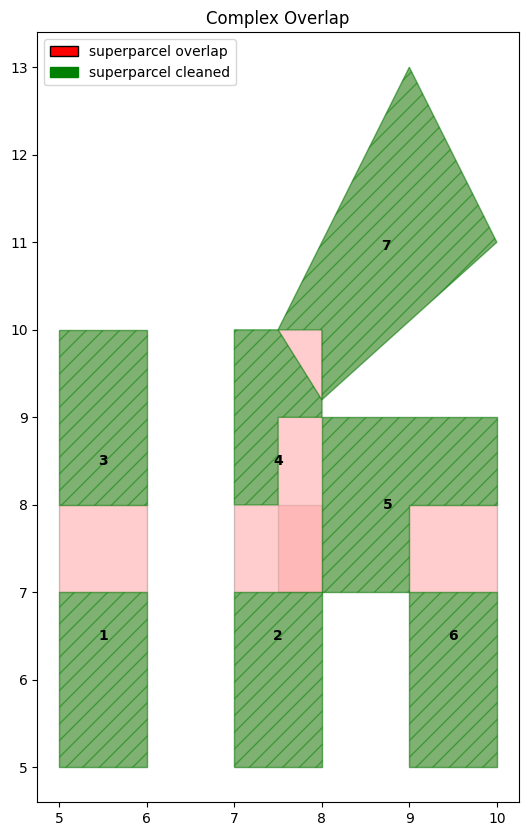

,sp_id,geometry
0,1,"POLYGON ((5 5, 6 5, 6 8, 5 8, 5 5))"
1,2,"POLYGON ((7 5, 8 5, 8 8, 7 8, 7 5))"
2,3,"POLYGON ((5 7, 6 7, 6 10, 5 10, 5 7))"
3,4,"POLYGON ((7 7, 8 7, 8 10, 7 10, 7 7))"
4,5,"POLYGON ((7.5 9, 7.5 7, 10 7, 10 9, 7.5 9))"
5,6,"POLYGON ((9 8, 9 5, 10 5, 10 8, 9 8))"
6,7,"POLYGON ((7.5 10, 8 9.2, 10 11, 9 13, 7.5 10))"


,sp_id,geometry
0,1,"POLYGON ((6 5, 5 5, 5 7, 6 7, 6 5))"
1,2,"POLYGON ((7 5, 7 7, 7.5 7, 8 7, 8 5, 7 5))"
2,3,"POLYGON ((5 10, 6 10, 6 8, 5 8, 5 10))"
3,4,"POLYGON ((8 9, 7.5 9, 7.5 8, 7 8, 7 10, 7.5 10..."
4,5,"POLYGON ((10 8, 9 8, 9 7, 8 7, 8 8, 8 9, 10 9,..."
5,6,"POLYGON ((10 5, 9 5, 9 7, 10 7, 10 5))"
6,7,"POLYGON ((9 13, 10 11, 8 9.2, 8 10, 7.5 10, 9 ..."


In [167]:
gdf_cleaned = remove_overlap(gdf)
cm.add_gdf(
    gdf_cleaned, 
    layer='superparcel cleaned', 
    style={'facecolor': 'green', 'edgecolor': 'green', 'hatch':'//', 'alpha':0.5})
cm.plot()
display(gdf)
display(gdf_cleaned)